Task 1:

In [3]:
pip install pandas numpy matplotlib seaborn


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ----------------------------- ---------- 6.0/8.0 MB 30.8 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 30.4 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 13.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 24.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 25.2 MB/s eta 0:00:00


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [6]:
print(customers.head())
print()
print(products.head())
print()
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3     

In [7]:
# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [9]:
# Summary statistics of numeric columns
print(customers.describe())
print()
print(products.describe())
print()
print(transactions.describe())

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [10]:
# Convert SignupDate and TransactionDate to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [11]:
# Check if there are any duplicates
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())

0
0
0


In [12]:
# Remove duplicates if any
#not required in our case
customers = customers.drop_duplicates()
products = products.drop_duplicates()
transactions = transactions.drop_duplicates()

C:\Users\dhiraj.kumar\AppData\Local\Temp\ipykernel_9728\1357237767.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='Set2')


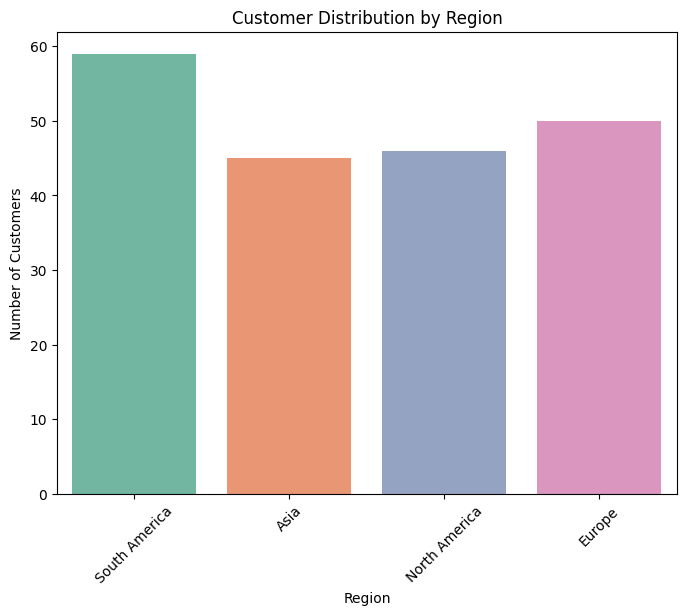

In [13]:
#Customer Distribution by Region
# Plot the distribution of customers by region
plt.figure(figsize=(8, 6))
sns.countplot(data=customers, x='Region', palette='Set2')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

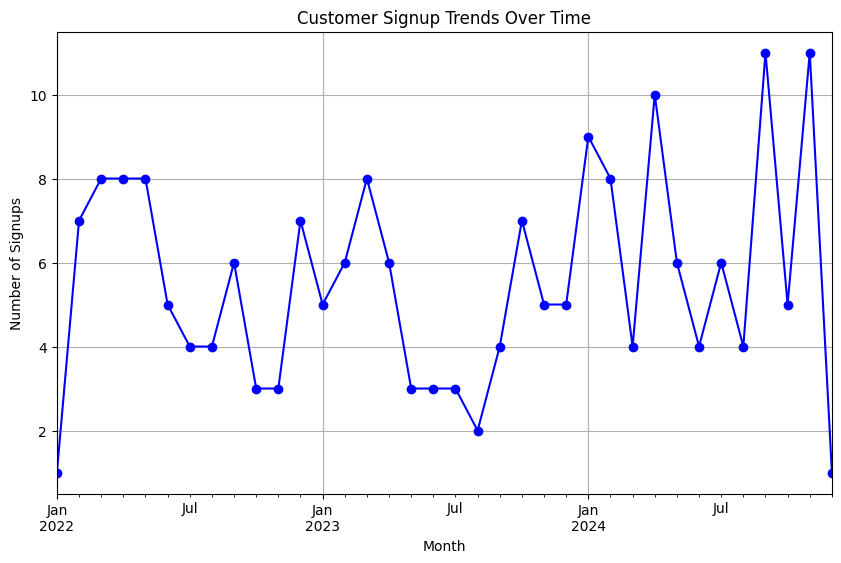

In [14]:
#Signup Trends Over Time
# Plot signups over time
customers['YearMonth'] = customers['SignupDate'].dt.to_period('M')
signup_trends = customers.groupby('YearMonth').size()

plt.figure(figsize=(10, 6))
signup_trends.plot(kind='line', marker='o', color='b')
plt.title('Customer Signup Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.grid(True)
plt.show()


C:\Users\dhiraj.kumar\AppData\Local\Temp\ipykernel_9728\1930030431.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products, x='Category', palette='Set3')


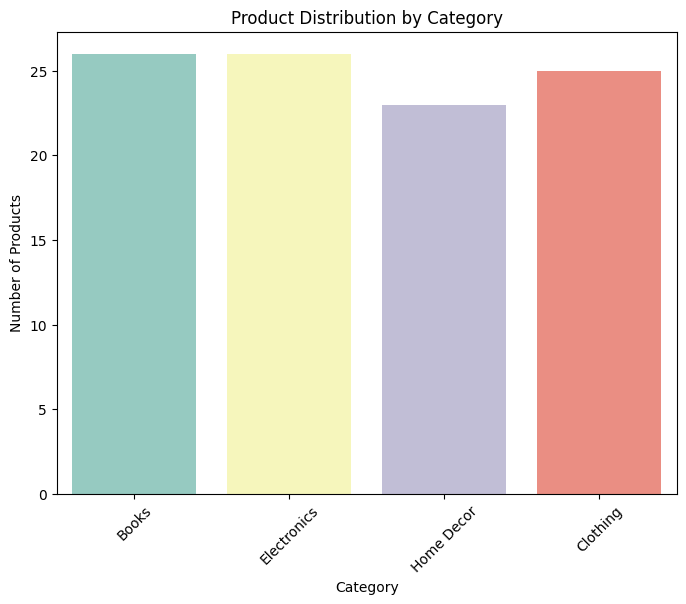

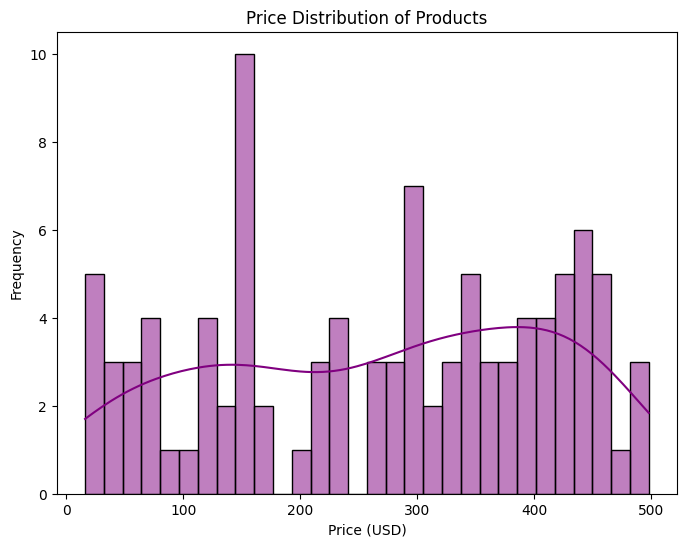

In [15]:
#Product Categories and Pricing
# Plot distribution of products by category
plt.figure(figsize=(8, 6))
sns.countplot(data=products, x='Category', palette='Set3')
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

# Plot the price distribution of products
plt.figure(figsize=(8, 6))
sns.histplot(products['Price'], kde=True, color='purple', bins=30)
plt.title('Price Distribution of Products')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()


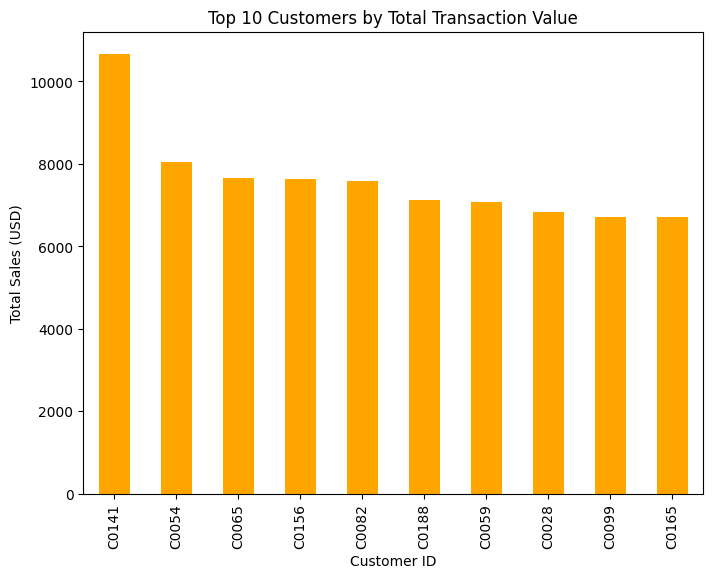

<Figure size 1000x600 with 0 Axes>

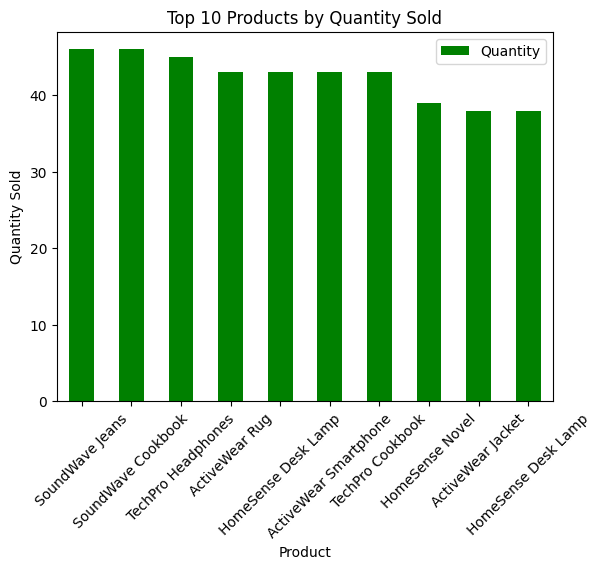

In [16]:
# Transaction Analysis
# Total transaction value per customer
customer_total_sales = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)

# Plot the top 10 customers by total sales
plt.figure(figsize=(8, 6))
customer_total_sales.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Customers by Total Transaction Value')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales (USD)')
plt.show()

# Transaction frequency by product
product_sales = transactions.groupby('ProductID')['Quantity'].sum()

# Merge with product information to get product names
product_sales = product_sales.reset_index()
product_sales = pd.merge(product_sales, products[['ProductID', 'ProductName']], on='ProductID')

# Plot top 10 products by quantity sold
plt.figure(figsize=(10, 6))
product_sales.sort_values(by='Quantity', ascending=False).head(10).plot(kind='bar', x='ProductName', y='Quantity', color='green')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()


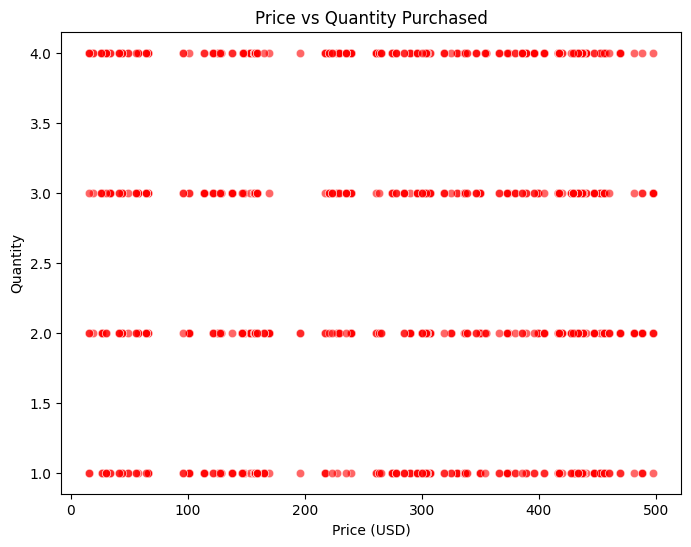

In [17]:
# Transaction Patterns (Price vs Quantity)
# Plot relationship between price and quantity purchased
plt.figure(figsize=(8, 6))
sns.scatterplot(data=transactions, x='Price', y='Quantity', alpha=0.6, color='red')
plt.title('Price vs Quantity Purchased')
plt.xlabel('Price (USD)')
plt.ylabel('Quantity')
plt.show()


Task 2

In [18]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from collections import defaultdict

In [19]:
# Merge transactions with product data to get product category
transactions = transactions.merge(products[['ProductID', 'Category']], on='ProductID')

# Aggregate transaction data per customer
customer_transactions = transactions.groupby(['CustomerID', 'Category']).agg(
    total_spent=('TotalValue', 'sum'),
    total_quantity=('Quantity', 'sum')
).reset_index()

# Create a pivot table for customers with product categories as columns
customer_profile = customer_transactions.pivot_table(
    index='CustomerID',
    columns='Category',
    values='total_spent',
    aggfunc='sum',
    fill_value=0
)

# Include customer demographics (region, signup date) in the profile
customer_profile = customer_profile.merge(customers[['CustomerID', 'Region']], on='CustomerID')


In [20]:
# Standardize transaction data (numeric features only)
scaler = StandardScaler()
transaction_features = customer_profile.drop(['CustomerID', 'Region'], axis=1)
transaction_features_scaled = pd.DataFrame(scaler.fit_transform(transaction_features), columns=transaction_features.columns)

# Include the region (non-numeric) as it can also contribute to similarity
customer_profile_scaled = pd.concat([customer_profile[['CustomerID', 'Region']], transaction_features_scaled], axis=1)


In [21]:
# Extract the feature vectors (excluding CustomerID and Region)
customer_vectors = customer_profile_scaled.drop(['CustomerID', 'Region'], axis=1)

# Compute cosine similarity matrix
similarity_matrix = cosine_similarity(customer_vectors)

# Convert similarity matrix to a DataFrame for easier analysis
similarity_df = pd.DataFrame(similarity_matrix, index=customer_profile_scaled['CustomerID'], columns=customer_profile_scaled['CustomerID'])

# Inspect the similarity matrix
print(similarity_df.head())


CustomerID     C0001     C0002     C0003     C0004     C0005     C0006  \
CustomerID                                                               
C0001       1.000000 -0.402215  0.648350  0.043313  0.661203 -0.960708   
C0002      -0.402215  1.000000  0.175482 -0.446094  0.257825  0.235584   
C0003       0.648350  0.175482  1.000000  0.328565  0.932178 -0.734670   
C0004       0.043313 -0.446094  0.328565  1.000000  0.092857 -0.005891   
C0005       0.661203  0.257825  0.932178  0.092857  1.000000 -0.814067   

CustomerID     C0007     C0008     C0009     C0010  ...     C0191     C0192  \
CustomerID                                          ...                       
C0001       0.637812 -0.268011  0.171019 -0.381244  ... -0.059019  0.830892   
C0002       0.166689  0.470266  0.588281  0.703980  ... -0.527737 -0.050379   
C0003       0.996881  0.202597  0.198752 -0.372100  ... -0.448319  0.462407   
C0004       0.347577  0.112209 -0.725347 -0.913367  ...  0.068221 -0.451726   
C0005  

In [22]:
# Define the list of customers we are interested in (C0001 to C0020)
target_customers = ['C0001', 'C0002', 'C0003', 'C0004', 'C0005', 'C0006', 'C0007', 'C0008', 'C0009', 'C0010',
                    'C0011', 'C0012', 'C0013', 'C0014', 'C0015', 'C0016', 'C0017', 'C0018', 'C0019', 'C0020']

# Create a dictionary to store the lookalike recommendations
lookalike_map = defaultdict(list)

# For each target customer, get top 3 similar customers (excluding themselves)
for customer_id in target_customers:
    similarities = similarity_df[customer_id].sort_values(ascending=False)  # Sort by similarity score
    top_similar_customers = similarities.drop(customer_id).head(3)  # Exclude the customer itself
    for similar_customer_id, score in top_similar_customers.items():
        lookalike_map[customer_id].append((similar_customer_id, score))

# Convert the lookalike map to a DataFrame
lookalike_data = []
for customer_id, similar_customers in lookalike_map.items():
    for similar_customer_id, score in similar_customers:
        lookalike_data.append([customer_id, similar_customer_id, score])

lookalike_df = pd.DataFrame(lookalike_data, columns=['CustomerID', 'LookalikeID', 'SimilarityScore'])

# Inspect the results
print(lookalike_df.head())


  CustomerID LookalikeID  SimilarityScore
0      C0001       C0091         0.988848
1      C0001       C0069         0.984344
2      C0001       C0184         0.978562
3      C0002       C0159         0.979511
4      C0002       C0036         0.956762


In [23]:
# Save the recommendations to a CSV file
lookalike_df.to_csv('Lookalike.csv', index=False)


Task 3

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# Merge transactions with product data
transactions = transactions.groupby(['CustomerID', 'ProductID']).agg(
    total_spent=('TotalValue', 'sum'),
    total_quantity=('Quantity', 'sum')
).reset_index()

# Pivot the data to create a customer-product matrix
customer_profile = transactions.pivot_table(
    index='CustomerID',
    columns='ProductID',
    values='total_spent',
    aggfunc='sum',
    fill_value=0
)

# Merge the aggregated transaction data with customer demographic data
customer_profile = customer_profile.merge(customers[['CustomerID', 'Region']], on='CustomerID')

In [26]:
# Normalize transaction data using StandardScaler
scaler = StandardScaler()
transaction_data = customer_profile.drop(['CustomerID', 'Region'], axis=1)
transaction_data_scaled = pd.DataFrame(scaler.fit_transform(transaction_data), columns=transaction_data.columns)

# Combine the scaled transaction data with the region data
customer_features = pd.concat([customer_profile[['CustomerID', 'Region']], transaction_data_scaled], axis=1)


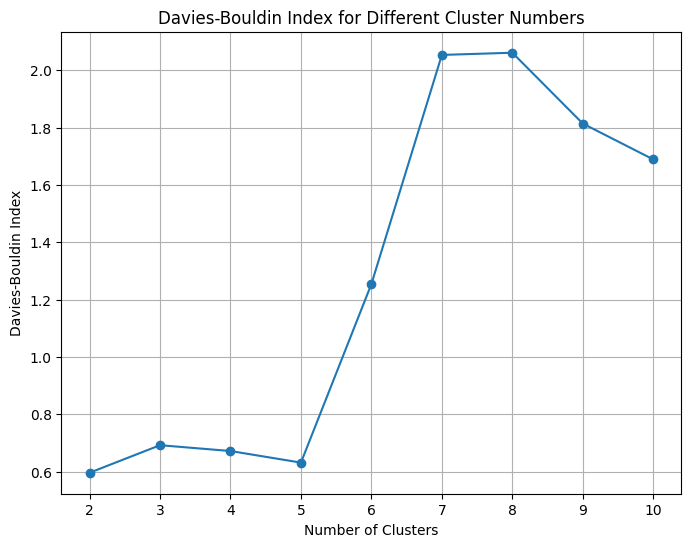

In [27]:
# Define a range of cluster numbers (between 2 and 10)
cluster_range = range(2, 11)

# Store Davies-Bouldin scores for each cluster number
db_scores = []

# Perform clustering for each cluster number
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    customer_features['Cluster'] = kmeans.fit_predict(customer_features.drop(['CustomerID', 'Region'], axis=1))
    
    # Calculate Davies-Bouldin Index
    db_index = davies_bouldin_score(customer_features.drop(['CustomerID', 'Region'], axis=1), customer_features['Cluster'])
    db_scores.append(db_index)

# Plot the Davies-Bouldin Index for different cluster numbers
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, db_scores, marker='o')
plt.title('Davies-Bouldin Index for Different Cluster Numbers')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.grid(True)
plt.show()

# Choose the optimal number of clusters (let's assume it's 4 based on the plot)
optimal_clusters = 4


In [28]:
# Apply KMeans clustering with optimal clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(customer_features.drop(['CustomerID', 'Region'], axis=1))

# Add cluster labels back to the customer profile data
customer_profile['Cluster'] = customer_features['Cluster']

# Inspect the clustering result
print(customer_profile[['CustomerID', 'Cluster']].head())


  CustomerID  Cluster
0      C0001        1
1      C0002        1
2      C0003        1
3      C0004        1
4      C0005        2


In [29]:
# Calculate the Davies-Bouldin Index for the final clustering
final_db_index = davies_bouldin_score(customer_features.drop(['CustomerID', 'Region'], axis=1), customer_features['Cluster'])
print(f'Davies-Bouldin Index: {final_db_index}')


Davies-Bouldin Index: 3.6569371293553643


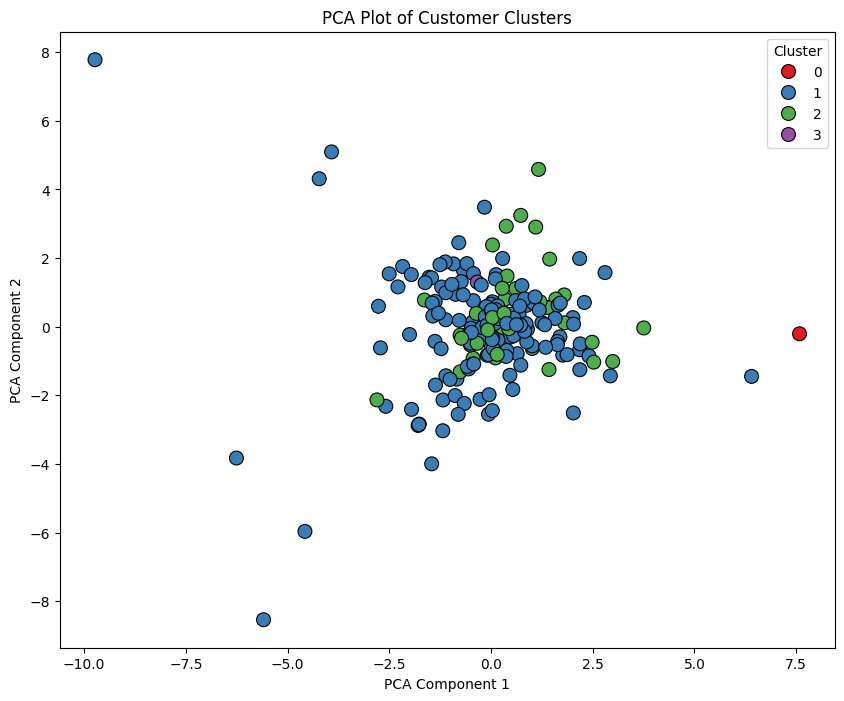

In [30]:
# Apply PCA to reduce the dimensions to 2D
pca = PCA(n_components=2)
pca_components = pca.fit_transform(customer_features.drop(['CustomerID', 'Region'], axis=1))

# Create a DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = customer_features['Cluster']

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=100, edgecolor='black')
plt.title('PCA Plot of Customer Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()
